# <font color = #6986C5> Public health study -  FAO </font>
![Logo FAO](https://www.ciheam.org/uploads/pictures/157/content_fao_h1501.png)

After joining a team of researchers from the ***Food and Agriculture Organization of the United Nations (FAO)***, as a data analyst, our mission is to conduct a study on the state of malnutrition in the world. 

The data on which we will mainly work in this project will be for the year **2017** :

### <font color = #7a69c5> Import of libraries, dataframes : </font>

In [1]:
# Import of libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")


# Loading .csv files into DataFrames
df_aideAlimentaire = pd.read_csv('data/aide_alimentaire.csv')
df_dispoAlimentaire = pd.read_csv('data/dispo_alimentaire.csv')
df_population = pd.read_csv('data/population.csv')
df_sousNutrition = pd.read_csv('data/sous_nutrition.csv')

# Shape of dataframes
print(df_aideAlimentaire.shape)
print(df_dispoAlimentaire.shape)
print(df_population.shape)
print(df_sousNutrition.shape)

(1475, 4)
(15605, 18)
(1416, 3)
(1218, 3)





---



## <font color = #6986C5 > Question 1: The proportion of people who are undernourished:</font>
To find the proportion of undernourished people in 2017, we will first need the world population in 2017.

In [2]:
# Dataframe inspection : df_population :
df_population.describe(include='all')

,Zone,Année,Valeur
count,1416,1416.0,1.416000e+03
unique,236,NaN,NaN
top,Afghanistan,NaN,NaN
freq,6,NaN,NaN
mean,NaN,2015.5,3.144793e+04
...,...,...,...
min,NaN,2013.0,7.930000e-01
25%,NaN,2014.0,3.783410e+02
50%,NaN,2015.5,5.126480e+03
75%,NaN,2017.0,1.930666e+04


In [3]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [4]:
df_population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [5]:
df_population.isna().mean()

Zone      0.0
Année     0.0
Valeur    0.0
dtype: float64

The dataframe has been successfully imported. There is no missing data. 

According to the **data lexicon**, the 'Valeur' data are expressed in **thousands of inhabitants**. It is important to remember this for the rest of the procedure.

As a reminder, we will analyze the year **2017**.

In [6]:
# World population in 2017 :
df_population2017 = df_population[df_population['Année'] == 2017]
population2017 = df_population2017['Valeur'].sum()

print("The world population in 2017 is about {:,.2f} million inhabitants".format(population2017/1000).replace(',',' '))


The world population in 2017 is about 7 548.13 million inhabitants


According to our dataframe, the world population in 2017 is 7,548 million people or **7.548 billion people.** 

According to the [United Nations](https://www.un.org/development/desa/publications/world-population-prospects-the-2017-revision.html) sources the population was **7.6 billion in 2017** which matches the data found. 
______________________________________________________________________________________________________________________
We will now search for the number of people counted as undernourished during the year 2017 by inspecting the dataframe *df_sousNutrition*.

In [72]:
# Dataframe inspection : df_sousNutrition :
df_sousNutrition.describe(include = 'all')

,Zone,Année,Valeur
count,1218,1218,624.000000
unique,203,6,NaN
top,Afghanistan,2012-2014,NaN
freq,6,203,NaN
mean,NaN,NaN,5.113462
...,...,...,...
min,NaN,NaN,0.050000
25%,NaN,NaN,0.275000
50%,NaN,NaN,1.100000
75%,NaN,NaN,3.900000


In [73]:
df_sousNutrition.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

The variable '**Valeur**' is not good. It should be expressed as 'float'. We have to change the data type.

We notice that there is a string : '<0.1' in the variable, we take to change this variable in 0.05 to be able to transform it in float.

In [9]:
df_sousNutrition.loc[df_sousNutrition['Valeur'] == '<0.1', 'Valeur'] = 0.05 
# We did not put 0 because <0.1 does not mean that there are no undernourished people.

In [10]:
# Conversion of values to numeric (float)
df_sousNutrition['Valeur'] = pd.to_numeric(df_sousNutrition['Valeur'])

In [74]:
# Verification of the change
df_sousNutrition.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [75]:
df_sousNutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


=> After inspection of the DataFrame (sous-nutrition), we noticed that the columns were not of the right type. We made the change, allowing us to work on the 'Valeur' column for the rest of the project. 

*Reminder:*
* According to our **Data Glossary**, the 'Valeur' column of this DataFrame expresses the data in **Millions of Inhabitants**,
* we are looking for the number of people who are undernourished in the year 2017. 
    
We will see if there is any missing data in our dataset:

In [76]:
# Select - Year 2017
sousNutrition2017 = df_sousNutrition.loc[df_sousNutrition['Année'] == '2016-2018']

# Missing Data
print(sousNutrition2017.isna().mean()*100) # % data missing
print()
print("There is", '{:1.2%}'.format(sousNutrition2017.iloc[:,2].isna().mean()),'\'NaN\' data for our \'Valeur\' variable in the year 2017.')


Zone       0.000000
Année      0.000000
Valeur    48.768473
dtype: float64

There is 48.77% 'NaN' data for our 'Valeur' variable in the year 2017.


**Warning**: NaN data does not mean that there is missing data. It can also mean that the country has no undernourished people. 

We will calculate the number of undernourished people during 2017 for countries where **this value is known.** 

Afterwards, we could make an estimate of the overall population by doing this calculation:
> = totalSousNutrition / (1 - [percentage of NaN data in our 'Valeur' variable] )

In [77]:
# Undernourished population (surveyed)
totalSousNutrition = sousNutrition2017['Valeur'].sum()
print('The population surveyed according to our undernourished data in 2017 would be', '{:,}'.format(totalSousNutrition), 'million.')


The population surveyed according to our undernourished data in 2017 would be 536.7 million.


In [78]:
# Estimate of the undernourished population
totalEstimSousNutrition = totalSousNutrition/(1-(sousNutrition2017['Valeur'].isna().mean()))
print('The estimated undernourished population in 2017 would be', '{:.2f}'.format(totalEstimSousNutrition).replace(',',''), 'million.')



The estimated undernourished population in 2017 would be 1047.60 million.


*Reminder*:

The ***difference*** between the proportion of people counted and estimated is due to the 48% missing data in our *'sousNutrition'* dataframe. The missing data are potentially due either to countries that do not have undernourished people (developed countries), or to countries where the measurement of this data is too difficult.

The estimation is done in order to deal with the missing values of the areas not included in the undernutrition dataframe compared to the population dataframe; including countries for which it is known that there are nutrition problems but where it is difficult to obtain data due to lack of means, conflicts etc...

In [79]:
# Calculation of the proportion of undernourished people
tauxSousNutri = totalSousNutrition/(population2017/1000)
tauxSousNutriEstim = totalEstimSousNutrition/(population2017/1000)

print('The proportion of people identified as undernourished in the world is','{:,.2%}'.format(tauxSousNutri),'in 2017')
print('The proportion of people estimated to be undernourished in the world is','{:,.2%}'.format(tauxSousNutriEstim),'in 2017')


The proportion of people identified as undernourished in the world is 7.11% in 2017
The proportion of people estimated to be undernourished in the world is 13.88% in 2017


## <font color = #6986C5> Question #2: The theoretical number of people who could be fed based on global food availability in 2017: </font>
Assuming that the average recommended daily intake is **2,500 kcal per day per person** according to the FAO source indicated below.

[Source FAO](https://www.fao.org/3/x8200f/X8200F03.htm) (*this is an estimate)*

To know the theoretical number of people who could be fed according to the world food availability, we will need :
* [x] to know the **world population in 2017**;
* [ ] the total food availability (kcal/person/day);
* [ ] the number of areas (countries) allowing for this food availability.

______________________________________________________________________________________________________________________
We will now look at the global food availability during the year **2017**. We will now inspect the dataframe *df_dispoAlimentaire*

In [80]:
# Inspect : df_dispoAlimentaire
df_dispoAlimentaire.describe(include ='all')

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.00000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Inde,Abats Comestible,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.29346,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,NaN,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.00000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.00000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,NaN,NaN,NaN,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.75000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000


In [18]:
df_dispoAlimentaire.describe(include='all')

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,15605,15605,15605,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.00000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
unique,174,98,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Inde,Abats Comestible,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,97,174,11896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.29346,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,NaN,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.00000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.00000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.00000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,NaN,NaN,NaN,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.75000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000


In [19]:
df_population.describe(include='all')

,Zone,Année,Valeur
count,1416,1416.0,1.416000e+03
unique,236,NaN,NaN
top,Afghanistan,NaN,NaN
freq,6,NaN,NaN
mean,NaN,2015.5,3.144793e+04
...,...,...,...
min,NaN,2013.0,7.930000e-01
25%,NaN,2014.0,3.783410e+02
50%,NaN,2015.5,5.126480e+03
75%,NaN,2017.0,1.930666e+04


In [20]:
df_dispoAlimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [21]:
df_dispoAlimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

In [22]:
df_dispoAlimentaire.isna().mean()

Zone                                                             0.000000
Produit                                                          0.000000
Origine                                                          0.000000
Aliments pour animaux                                            0.825697
Autres Utilisations                                              0.647805
Disponibilité alimentaire (Kcal/personne/jour)                   0.087408
Disponibilité alimentaire en quantité (kg/personne/an)           0.101890
Disponibilité de matière grasse en quantité (g/personne/jour)    0.244217
Disponibilité de protéines en quantité (g/personne/jour)         0.259148
Disponibilité intérieure                                         0.014290
Exportations - Quantité                                          0.216533
Importations - Quantité                                          0.048254
Nourriture                                                       0.101890
Pertes                                

After inspection of the dataframe, the data types are correct.
We notice the appearance of some 'NaN' in our dataframe. If we take a closer look at the dataframe, we notice that these are not necessarily missing data but potentially null data. For example, the countries have no use for some of the products in this dataframe.

* We will start by finding the number of zones (countries) available in this dataframe;
* Then we will calculate the daily food availability in kcal/person

In [81]:
# Number of areas in  dataframe df_dispoAlimentaire & df_population
nb_zone = df_dispoAlimentaire['Zone'].nunique()
print(f'The number of different areas (countries) in  df_dispoAlimentaire is {nb_zone}')
nb_zonepays = df_population2017['Zone'].nunique()
print(f'The number of different areas (countries) in df_population is {nb_zonepays}')

The number of different areas (countries) in  df_dispoAlimentaire is 174
The number of different areas (countries) in df_population is 236


**WARNING :**

To calculate the world population that could be fed, we calculated the world population on the df_population.

If we compare the number of zones (countries) between the two dataframes, we don't get the same thing. 

<font color = #c5a869>**What are the differences between the unique countries of the two dataframes?**</font>

In [82]:
# Difference between the zones of the two dataframes: list of countries
listezone1 = df_dispoAlimentaire['Zone'].unique()
listezone2 = df_population["Zone"].unique()

diff_zone1 = list(set(listezone2)-set(listezone1))
diff_zone2 = list(set(listezone1)-set(listezone2))

print('Country availabie in df_population and not in df_dispoAlimentaire : ',diff_zone1)
print()
print('Country availabie in df_dispoAlimentaire and not in df_population : ',diff_zone2)

Country availabie in df_population and not in df_dispoAlimentaire :  ['Andorre', 'Groenland', 'Guam', 'Somalie', 'Qatar', 'Îles Marshall', 'Îles Wallis-et-Futuna', 'Nioué', 'Saint-Barthélemy', 'Guinée équatoriale', 'Îles Falkland (Malvinas)', 'Singapour', 'Montserrat', 'Soudan du Sud', 'Papouasie-Nouvelle-Guinée', 'Bonaire, Saint-Eustache et Saba', 'Saint-Pierre-et-Miquelon', 'Saint-Marin', 'Martinique', 'Saint-Siège', 'Bhoutan', 'Sainte-Hélène, Ascension et Tristan da Cunha', 'Îles Féroé', 'Tonga', 'Libye', 'Érythrée', 'Îles Turques-et-Caïques', 'Palestine', 'Îles Cook', 'Réunion', 'Îles Vierges britanniques', 'Guyane française', 'Îles Mariannes du Nord', 'Burundi', 'Sahara occidental', 'Palaos', 'Seychelles', 'Gibraltar', 'Îles Caïmanes', 'Îles Anglo-Normandes', 'Comores', 'Bahreïn', 'Micronésie (États fédérés de)', 'Tchéquie', 'République démocratique du Congo', 'Guadeloupe', 'Tuvalu', 'Samoa américaines', 'Sint Maarten  (partie néerlandaise)', 'Porto Rico', 'Anguilla', "Royaume-Uni

In [83]:
# Calculation of the world population on the list of countries belonging to the 2 dataframes
df_v2_population2017 = df_population2017[df_population2017['Zone'].isin(listezone1)]
v2_population2017 = df_v2_population2017['Valeur'].sum()
print("The world population in 2017 would be about {:,.2f} million inhabitants taking into account only the areas of the df_dispoAlimentaire".format(v2_population2017/1000).replace(',',' '))
print()
print("The difference between the population estimates of the 2 dataframes is therefore : {:.2f} million inhabitants".format((population2017/1000)-(v2_population2017/1000)))

The world population in 2017 would be about 7 291.90 million inhabitants taking into account only the areas of the df_dispoAlimentaire

The difference between the population estimates of the 2 dataframes is therefore : 256.23 million inhabitants


#### Info : 
So we found a difference in the population estimate between the two dataframes. One explanation for this difference is that the 'United Kingdom' and 'Czechia(the)' do not have the same name in the population dataframe:
- 'Czechia'
- United Kingdom of Great Britain and Northern Ireland".

For the following: we will perform the calculations according to the parameters of the concerned dataframe. 
___
#### <font color = c5a869> Calculation of the daily food availability in kcal/person </font>

In [84]:
#  Calculation of the daily food availability in kcal/person
dispoAlimentaireJour = df_dispoAlimentaire['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispoAlim_nbZone = dispoAlimentaireJour/nb_zone
print('The daily food availability is {:,.0f} kcal/person in the world.'.format(dispoAlim_nbZone).replace(',',' '))

The daily food availability is 2 847 kcal/person in the world.


####  <font color = c5a869> Number of people who can be fed in the world according to the daily food availability in kcal/person </font>

In [85]:
# Calculation of the number of people who can be fed in the world
ajr = 2500 

nbPersonneNourri = (dispoAlim_nbZone/ajr)* (population2017/1000)
print('According to our calculations, approximately', '{:,.2f}'.format(nbPersonneNourri).replace(',',' '),'million of the world\'s population could be fed according to the daily food availability (Kcal/person/day).')
print()
print("This represents about {:.2%} of the world population".format((nbPersonneNourri/(population2017/1000))))


According to our calculations, approximately 8 596.93 million of the world's population could be fed according to the daily food availability (Kcal/person/day).

This represents about 113.89% of the world population


---

## <font color = #6986C5>Question #3: The theoretical number of people who could be fed based on global food availability of plant products in 2017:</font>

We will keep the different variables calculated above and add constraints to calculate only the food availability of plant products. This will allow us to calculate the theoretical number of people who could be fed according to this availability.

In [86]:
# Creation of the dataframe with the plants in origin 
df_vegetaux = df_dispoAlimentaire[df_dispoAlimentaire['Origine'] == 'vegetale']
df_vegetaux.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN


In [29]:
df_vegetaux['Zone'].nunique()

174

We make the same calculation as in question n°2 to know the number of people potentially fed by the vegetable products.

For this we will need :
* food availability (kcal/person/day)
* number of zones
    * (variable -> nb_zone)
* world population
    * (variable -> population2017)
* recommended daily intake, *(i.e. see above = 2500 kcal/day)*
    * (variable -> ajr)

In [87]:
# Calculation of daily food availability for a person available through plant products
dispoVegetaux = (df_vegetaux['Disponibilité alimentaire (Kcal/personne/jour)'].sum())/nb_zone
print('The daily food availability from plant products is {:,.0f} kcal/person in the world'.format(dispoVegetaux).replace(',',' '))


The daily food availability from plant products is 2 292 kcal/person in the world


In [88]:
# Calcul du nombre de personnes pouvant être nourries dans le monde grâce aux produits végétaux
nbPerNourriVegetaux = (dispoVegetaux/ajr)*(population2017/1000) # pour rappel, la population est exprimé en milliers
print('According to our calculations, about ', '{:,.2f}'.format(nbPerNourriVegetaux).replace(',',' '),'million of the world\'s population could be fed according to the daily food availability of plant products (Kcal/person/day).')
print()
print("This represents about {:.2%} of the world population".format((nbPerNourriVegetaux/(population2017/1000))))


According to our calculations, about  6 919.68 million of the world's population could be fed according to the daily food availability of plant products (Kcal/person/day).

This represents about 91.67% of the world population


---

## <font color = #6986C5> Question n°4: the use of internal availability </font>

In particular, we look for the share that is attributed to ***animal feed***, the share that is ***wasted*** and the share that is actually used for ***human food*** according to the **internal availability** of the country.

**Important** : Julien has left us in the *'Data Lexicon'* a way to calculate the internal availability.

The calculation of availability is a 3 term equation of the type: 
A1 + A2 + \[...\] = **Internal Availability** = B1 + B2 + \[...\]

* This equation involves the 10 variables (+ the variable: domestic availability) of the food availability file for the year 2017. 

We can therefore obtain the following equation for domestic availability:
> Production + Imports + Inventory Changes - Exports = **Internal Availability** = Food + Animal Feed + Seed + Processing + Other Uses + Losses

In [89]:
# Calculation to verify our equation with an example: Area = Japan & Products = Shellfish (Crustacés)
df_crustacesJapon = df_dispoAlimentaire[(df_dispoAlimentaire['Zone']=='Japon') & (df_dispoAlimentaire['Produit']=='Crustacés')]
crustacesJaponDI = df_crustacesJapon['Disponibilité intérieure'].sum()
crustacesJaponDI2 = df_crustacesJapon['Production'].sum()+df_crustacesJapon['Importations - Quantité'].sum()+df_crustacesJapon['Variation de stock'].sum()-df_crustacesJapon['Exportations - Quantité'].sum()
crustacesJaponDI3 = df_crustacesJapon['Nourriture'].sum()+df_crustacesJapon['Aliments pour animaux'].sum()+df_crustacesJapon['Semences'].sum()+df_crustacesJapon['Traitement'].sum()+df_crustacesJapon['Autres Utilisations'].sum()+df_crustacesJapon['Pertes'].sum()

print(crustacesJaponDI,crustacesJaponDI2,crustacesJaponDI3)


1139.0 1139.0 1139.0


We have just checked our equation with the 'Japan/Crustacés' data and we get the same result for the different variables. 

We are now going to calculate the world domestic availability as well as the share attributed to animal feed, food waste and human food. 

In [91]:
# # Calculation of global domestic availability 
dispoIntérieure = int(df_dispoAlimentaire['Disponibilité intérieure'].sum())
print('The world domestic availability is  {:,} thousand tons.'.format(dispoIntérieure).replace(',',' '))

The world domestic availability is  9 848 994 thousand tons.


In [93]:
# Calculation of the share attributed to animal feed, human feed & food waste

alimentationAnimale = int(df_dispoAlimentaire['Aliments pour animaux'].sum())
alimentationHumaine = int(df_dispoAlimentaire['Nourriture'].sum())
pertesAlimentaire = int(df_dispoAlimentaire['Pertes'].sum())

print('The world animal feed represents',
      '{:,}'.format(alimentationAnimale).replace(',',' '),'thousand tons, whici is equivalent to',
      '{:,.2%}'.format((alimentationAnimale/dispoIntérieure)).replace(',',' '),'of the world domestic availability.')
print()
print('Global human food represents',
      '{:,}'.format(alimentationHumaine).replace(',',' '),'thousand tons, whici is equivalent to',
      '{:,.2%}'.format((alimentationHumaine/dispoIntérieure)).replace(',',' '),'of the world domestic availability.')
print()
print('The world food loss represents',
      '{:,}'.format(pertesAlimentaire).replace(',',' '),'thousand tons, whici is equivalent to',
      '{:,.2%}'.format((pertesAlimentaire/dispoIntérieure)).replace(',',' '),'of the world domestic availability.')
      

The world animal feed represents 1 304 245 thousand tons, whici is equivalent to 13.24% of the world domestic availability.

Global human food represents 4 876 258 thousand tons, whici is equivalent to 49.51% of the world domestic availability.

The world food loss represents 453 698 thousand tons, whici is equivalent to 4.61% of the world domestic availability.


---

## <font color = #6986C5> Answers to Julien's questioning and exploration of certain leads </font>

In the *'Data Lexicon'*, Julien (a collaborator) left us some tracks to exploit:
- There would be some interesting figures on cereals;
- The use of cassava by Thailand.

We are going to exploit these different tracks one by one and maybe find some interesting things. 

### <font color = #7a69c5>Use of cereals in the world :  </font>

Julien would have found some interesting things about the exploitation of cereals, especially the distribution between human food (i.e.: column **Nourriture**) and animal feed (i.e.: column **Aliments pour animaux**). 
It leaves us with the clue that the list of cereals can be found on the [FAO] website (http://www.fao.org/faostat/fr/#data) in the downloadable data. As a reminder, the link is given in the *'Data Lexicon'*.

We are going to exploit the FAO database to find the list of cereals and thus determine which food is in this list or not.

We have imported the database (FAO) corresponding to the **cereals and others** that are not part of the brewing process. We import this database only to find the list of foods in this list and thus allow us to sort on our dataframe the domestic availability of products corresponding to this same list. 

In [35]:
# Data importation :
df_cereales = pd.read_csv('data/FAOSTAT_data_11-10-2021.csv', sep=',')
df_cereales.describe(include='all')

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
count,19518,19518,19518.000000,19518,19518.000000,19518,19518.000000,19518,19518.0,19518.0,19518,19518.000000,19518,19518
unique,1,1,NaN,174,NaN,17,NaN,9,NaN,NaN,4,NaN,4,4
top,FBS,Bilans Alimentaires (2014-),NaN,Chine,NaN,Disponibilité intérieure,NaN,Maïs et produits,NaN,NaN,Milliers de tonnes,NaN,Im,Données de la FAO basées sur une méthodologie d'imputation
freq,19518,19518,NaN,144,NaN,1535,NaN,2639,NaN,NaN,14275,NaN,12641,12641
mean,NaN,NaN,128.778461,NaN,4092.902347,NaN,2552.832001,NaN,2017.0,2017.0,NaN,615.129929,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
min,NaN,NaN,1.000000,NaN,645.000000,NaN,2511.000000,NaN,2017.0,2017.0,NaN,-5399.000000,NaN,NaN
25%,NaN,NaN,66.000000,NaN,684.000000,NaN,2513.000000,NaN,2017.0,2017.0,NaN,0.000000,NaN,NaN
50%,NaN,NaN,123.000000,NaN,5142.000000,NaN,2516.000000,NaN,2017.0,2017.0,NaN,1.000000,NaN,NaN
75%,NaN,NaN,191.000000,NaN,5511.000000,NaN,2518.000000,NaN,2017.0,2017.0,NaN,33.000000,NaN,NaN


In [36]:
# Checking
df_cereales.head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,Im,Données de la FAO basées sur une méthodologie d'imputation
1,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,3080.0,Im,Données de la FAO basées sur une méthodologie d'imputation
2,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,32.0,Im,Données de la FAO basées sur une méthodologie d'imputation
3,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2.0,Im,Données de la FAO basées sur une méthodologie d'imputation
4,FBS,Bilans Alimentaires (2014-),2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,7326.0,S,Données standardisées


In [37]:
df_cereales.dtypes

Code Domaine               object
Domaine                    object
Code zone (FAO)             int64
Zone                       object
Code Élément                int64
Élément                    object
Code Produit                int64
Produit                    object
Code année                  int64
Année                       int64
Unité                      object
Valeur                    float64
Symbole                    object
Description du Symbole     object
dtype: object

In [38]:
df_cereales.isna().mean()

Code Domaine              0.0
Domaine                   0.0
Code zone (FAO)           0.0
Zone                      0.0
Code Élément              0.0
Élément                   0.0
Code Produit              0.0
Produit                   0.0
Code année                0.0
Année                     0.0
Unité                     0.0
Valeur                    0.0
Symbole                   0.0
Description du Symbole    0.0
dtype: float64

Pas de données manquantes ou de NaN dans notre importation des données.

In [39]:
# Creation of the list containing the different types of cereals : 
liste_cereales = pd.Series(df_cereales['Produit'].unique())
liste_cereales

0       Blé et produits
1       Riz et produits
2      Orge et produits
3      Maïs et produits
4    Seigle et produits
5                Avoine
6    Millet et produits
7    Sorgho et produits
8      Céréales, Autres
dtype: object

In [40]:
# Comparison with the current dataframe list
liste_cereales_df = df_dispoAlimentaire['Produit'].unique()
liste_cereales_df

array(['Abats Comestible', 'Agrumes, Autres', 'Aliments pour enfants',
       'Ananas', 'Bananes', 'Beurre, Ghee', 'Bière', 'Blé',
       'Boissons Alcooliques', 'Café', 'Coco (Incl Coprah)', 'Crème',
       'Céréales, Autres', 'Dattes', 'Edulcorants Autres',
       'Feve de Cacao', 'Fruits, Autres', 'Graines de coton',
       'Graines de tournesol', 'Graisses Animales Crue',
       'Huil Plantes Oleif Autr', 'Huile Graines de Coton',
       "Huile d'Arachide", "Huile d'Olive", 'Huile de Colza&Moutarde',
       'Huile de Palme', 'Huile de Soja', 'Huile de Sésame',
       'Huile de Tournesol', 'Lait - Excl Beurre', 'Légumes, Autres',
       'Légumineuses Autres', 'Maïs', 'Miel', 'Millet', 'Miscellanees',
       'Noix', 'Oeufs', 'Olives', 'Oranges, Mandarines', 'Orge',
       'Plantes Oleiferes, Autre', 'Poissons Eau Douce', 'Poivre',
       'Pommes', 'Pommes de Terre', 'Raisin', 'Riz (Eq Blanchi)',
       'Sucre Eq Brut', 'Sucre, betterave', 'Sucre, canne', 'Sésame',
       'Thé', 'Toma

We can see that our data is not completely identical with our food availability dataframe. If we look in detail at the list from the **FAO** website and the list from the dataframe we can see some differences.

Here are some examples
> **liste_cereales** : 'Blé et produits' ; 'Riz et produits'\
> **liste_cereales_df** : 'Blé' ; 'Riz (Eq Blanchi)'

We are going to make some modifications so that our list coming from the **FAO** site corresponds to the one in our dataframe.

In [41]:
# # Modification of our list to match our dataframe
liste_cereales2 = liste_cereales.replace(' et produits','',regex=True)
liste_cereales2 = liste_cereales2.replace('Riz','Riz (Eq Blanchi)',regex=True)
liste_cereales2

0                 Blé
1    Riz (Eq Blanchi)
2                Orge
3                Maïs
4              Seigle
5              Avoine
6              Millet
7              Sorgho
8    Céréales, Autres
dtype: object

In [42]:
# Creation of a new dataframe + addition of is_cereales column
df_dispoAlimentaire2 = df_dispoAlimentaire.copy() 
df_dispoAlimentaire2['is_cereales'] = df_dispoAlimentaire2['Produit'].isin(liste_cereales2) 
df_dispoAlimentaire2[df_dispoAlimentaire2['is_cereales']==True]['Produit'].unique() 

array(['Blé', 'Céréales, Autres', 'Maïs', 'Millet', 'Orge',
       'Riz (Eq Blanchi)', 'Avoine', 'Seigle', 'Sorgho'], dtype=object)

In [43]:
# Calculation of the tons of food in the list of cereals for human consumption and animal feed
cereales_humaines = df_dispoAlimentaire2[df_dispoAlimentaire2['is_cereales']== True]['Nourriture'].sum()
cereales_animales = df_dispoAlimentaire2[df_dispoAlimentaire2['is_cereales']== True]['Aliments pour animaux'].sum()

<font color = #c5a869> ***Another method to calculate the quantity of cereals without adding a column to the dataframe:***</font>

```python
cereales_humaines2 = df_dispoAlimentaire2[df_dispoAlimentaire2['Produit'].isin(liste_cereales2)]['Nourriture'].sum()
```

#### <font color=#c5a869>Rate of use of cereals for feed/human consumption on the domestic availability of cereals</font> 

In [94]:
cereales_dispo_int = int(df_dispoAlimentaire2[df_dispoAlimentaire2['is_cereales']==True]["Disponibilité intérieure"].sum())


print('According to the world domestic availability, cereals represent {:,} thousand tons'.format(cereales_dispo_int).replace(',',' '))
print()
print('The use of cereals in animal feed is ',
      '{:,}'.format(int(cereales_animales)).replace(',',' '),'thousand tons, which is equivalent to',
      '{:.2%}'.format(cereales_animales/cereales_dispo_int),'of the world domestic availability.')
print()
print('The use of cereals in human food is ',
      '{:,}'.format(int(cereales_humaines)).replace(',',' '),'thousand tons, which is equivalent to',
      '{:.2%}'.format(cereales_humaines/cereales_dispo_int),'of the world domestic availability.')


According to the world domestic availability  cereals represent 2 406 999 thousand tons

The use of cereals in animal feed is  873 535 thousand tons, which is equivalent to 36.29% of the world domestic availability.

The use of cereals in human food is  1 029 010 thousand tons, which is equivalent to 42.75% of the world domestic availability.


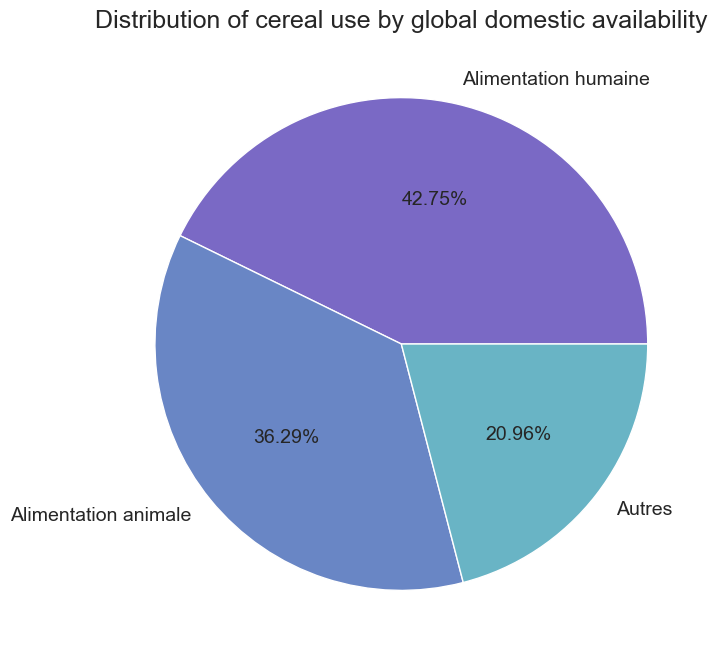

In [95]:
# Define data
data = [cereales_humaines,cereales_animales,cereales_dispo_int-(cereales_animales+cereales_humaines)]
labels = ['Alimentation humaine','Alimentation animale','Autres']

#graph
plt.figure(figsize=(12,8))
plt.title("Distribution of cereal use by global domestic availability",size=18)
plt.pie(data, labels=labels, autopct='%.2f%%',textprops={'fontsize':14},colors=['#7a69c5','#6986c5','#69b4c5'])
plt.show()

<font color=#c5a869>**Rate of cereal use in animal & human food**.</font>

In [96]:
nourriture_humaines = df_dispoAlimentaire['Nourriture'].sum()
nourriture_animale = df_dispoAlimentaire['Aliments pour animaux'].sum()

print('Cereals are used for ',
      '{:.2%}'.format(cereales_animales/nourriture_animale),'of animal feed',
      '{:.2%}'.format(cereales_humaines/nourriture_humaines),'of human food')

Cereals are used for  66.98% of animal feed 21.10% of human food


---

## <font color = #6986C5> Thailand: cassava exports and undernutrition</font>

Julien's second request concerns **Thailand**. According to him, there would be something interesting about the export of cassava in the country as well as the proportion of undernourished people in the country. 

In [47]:
# # Creation of the dataframe : Thaïlande - Cassava (Manioc)
df_ThailandeManioc = df_dispoAlimentaire[(df_dispoAlimentaire['Zone']=='Thaïlande')\
                                         &(df_dispoAlimentaire['Produit']=='Manioc')]
exportThailandeManioc = df_ThailandeManioc['Exportations - Quantité'].sum()
df_ThailandeManioc

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
13809,Thaïlande,Manioc,vegetale,1800.0,2081.0,40.0,13.0,0.05,0.14,6264.0,25214.0,1250.0,871.0,1511.0,30228.0,NaN,0.0,0.0


A quick reminder about domestic availability: 
> Domestic availability** = Production + Imports + Inventory changes (?) - Exports 

#### <font color=#c5a869>Export rate: calculated as export/production </font>

In [98]:
# Cassava export rate from Thailand:
tx_exportThailandeManioc = df_ThailandeManioc['Exportations - Quantité']/df_ThailandeManioc['Production']

print('In 2017, Thailand exported','{:.2%}'.format(tx_exportThailandeManioc.iloc[0]),'of its cassava')

# Calculation of the export share of cassava from Thailand to the world
exportMondeManioc = df_dispoAlimentaire["Exportations - Quantité"][df_dispoAlimentaire["Produit"]=="Manioc"].sum()
print()
print('In 2017, {:.2%} of the world\'s cassava exports came from Thailand'.format(exportThailandeManioc/exportMondeManioc))
                                                                                                            

In 2017, Thailand exported 83.41% of its cassava

In 2017, 69.94% of the world's cassava exports came from Thailand


#### <font color=#c5a869>Calculation of the proportion of undernourished people: Thailand</font>

In [99]:
# Undernourished People - Thailand (2017):
popSousNutriThailande = pd.to_numeric(df_sousNutrition[(df_sousNutrition['Zone']=='Thaïlande')\
                                            &(df_sousNutrition['Année']=='2016-2018')]['Valeur'].values)

# Population - Thailand (2017) :
popThailande = (df_population[(df_population['Zone']=='Thaïlande')\
                                            &(df_population['Année']==2017)]['Valeur'].values)/1000


# Rate undernourished people/population - Thailand (2017):
tauxThailande = pd.Series(popSousNutriThailande/popThailande)
print('In 2017,','{:.2%}'.format(tauxThailande.iloc[0]),'of Thailand\'s population was undernourished.')


In 2017, 8.96% of Thailand's population was undernourished.


So if we recap, we have for Thailand in 2017:

Cassava export | Undernourished population| Share of cassava export in the world
:----------------------:|:-------------------------:|:-------------------------:
83.41 %|8.96 %|69.94%

---
## <font color = #6986C5> Melanie query: more detailed study for each country </font>

Following the various previous requests, we receive a message from Melanie:

> **Melanie**: Absolutely! I would like to have a more detailed study for each country. For example, I would like you to give us the countries for which the proportion of undernourished people is the highest in 2017, those who have benefited the most from aid since 2013, those with the most/least availability/person, etc., and all the information that you would find useful to highlight the countries that seem to be in the most difficulty, food-wise.

So we will make these different requests.

---
### <font color = #7a69c5> Undernourishment: highest proportion of undernourished people in 2017 </font>

As a reminder: 
- df_population2017: population for each country expressed in thousands of inhabitants during the year 2017
- df_sousNutrition: dataframe concerning the food insecurity file


In addition, there is a***difference*** between the proportion of people counted and estimated, due to the 48% missing data in our *'sousNutrition'* dataframe. The missing data are potentially due either to countries that do not have undernourished people (developed countries), or to countries where the measurement of this data is too difficult.

The estimation is done in order to deal with the missing values of the areas not included in the undernourished dataframe compared to the population dataframe; including countries for which it is known that there are nutrition problems but where it is difficult to obtain data due to lack of means, conflicts etc...

Don't **forget** the replacement of the value '<0.1' in the under-nutrition dataframe by 0.05.

In [50]:
# Population undernourished in 2017 for each country
df_sousNutrition2017=df_sousNutrition[df_sousNutrition['Année']=='2016-2018']

In [100]:
# Merge between the two dataframes :
j_sousNutritionPop2017 = pd.merge(
                df_population2017,df_sousNutrition2017, on='Zone')
j_sousNutritionPop2017 = j_sousNutritionPop2017.drop('Année_y', 1)
j_sousNutritionPop2017 = j_sousNutritionPop2017.rename(columns = {'Année_x':'Année',
                                                                 "Valeur_x":"Population",
                                                                 "Valeur_y":"Population sous-nutrition"
                                                                 })
j_sousNutritionPop2017.head()

<ipython-input-100-62bdfb1f8d4e>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  j_sousNutritionPop2017 = j_sousNutritionPop2017.drop('Année_y', 1)


,Zone,Année,Population,Population sous-nutrition
0,Afghanistan,2017,36296.113,10.5
1,Afrique du Sud,2017,57009.756,3.1
2,Albanie,2017,2884.169,0.1
3,Algérie,2017,41389.189,1.3
4,Allemagne,2017,82658.409,NaN


**Notes on the calculation of the proportion:**
- In the variable 'proportion' to get the rate in each country of undernourished people, there is a division by 1000 and a multiplication by 100. 

- The division is used to transform the thousands of inhabitants into millions of inhabitants to correspond to the value in millions of inhabitants of undernourished people in the country.

- The multiplication allows us to have the proportion directly in percentage.

In [101]:
# Add a column in the join to calculate the proportion of undernourished people
j_sousNutritionPop2017=j_sousNutritionPop2017.assign(
                proportion=(j_sousNutritionPop2017["Population sous-nutrition"]/(j_sousNutritionPop2017["Population"]/1000))*100)
j_sousNutritionPop2017

,Zone,Année,Population,Population sous-nutrition,proportion
0,Afghanistan,2017,36296.113,10.5,28.928718
1,Afrique du Sud,2017,57009.756,3.1,5.437666
2,Albanie,2017,2884.169,0.1,3.467203
3,Algérie,2017,41389.189,1.3,3.140917
4,Allemagne,2017,82658.409,NaN,NaN
...,...,...,...,...,...
198,Venezuela (République bolivarienne du),2017,29402.484,8.0,27.208586
199,Viet Nam,2017,94600.648,6.5,6.870989
200,Yémen,2017,27834.819,NaN,NaN
201,Zambie,2017,16853.599,NaN,NaN


In [102]:
# Top 10: countries with the highest proportion of undernourished people in 2017
j_sousNutritionPop2017.nlargest(10,columns="proportion") # method#1

j_sousNutritionPop2017.sort_values('proportion',ascending=False).head(10) # method#2

,Zone,Année,Population,Population sous-nutrition,proportion
51,Dominique,2017,71.458,0.05,69.971172
78,Haïti,2017,10982.366,5.30,48.259182
157,République populaire démocratique de Corée,2017,25429.825,12.00,47.188685
164,Saint-Vincent-et-les Grenadines,2017,109.827,0.05,45.526146
98,Kiribati,2017,114.158,0.05,43.798945
108,Madagascar,2017,25570.512,10.50,41.062924
103,Libéria,2017,4702.226,1.80,38.279742
100,Lesotho,2017,2091.534,0.80,38.249438
183,Tchad,2017,15016.753,5.70,37.957606
161,Rwanda,2017,11980.961,4.20,35.055619


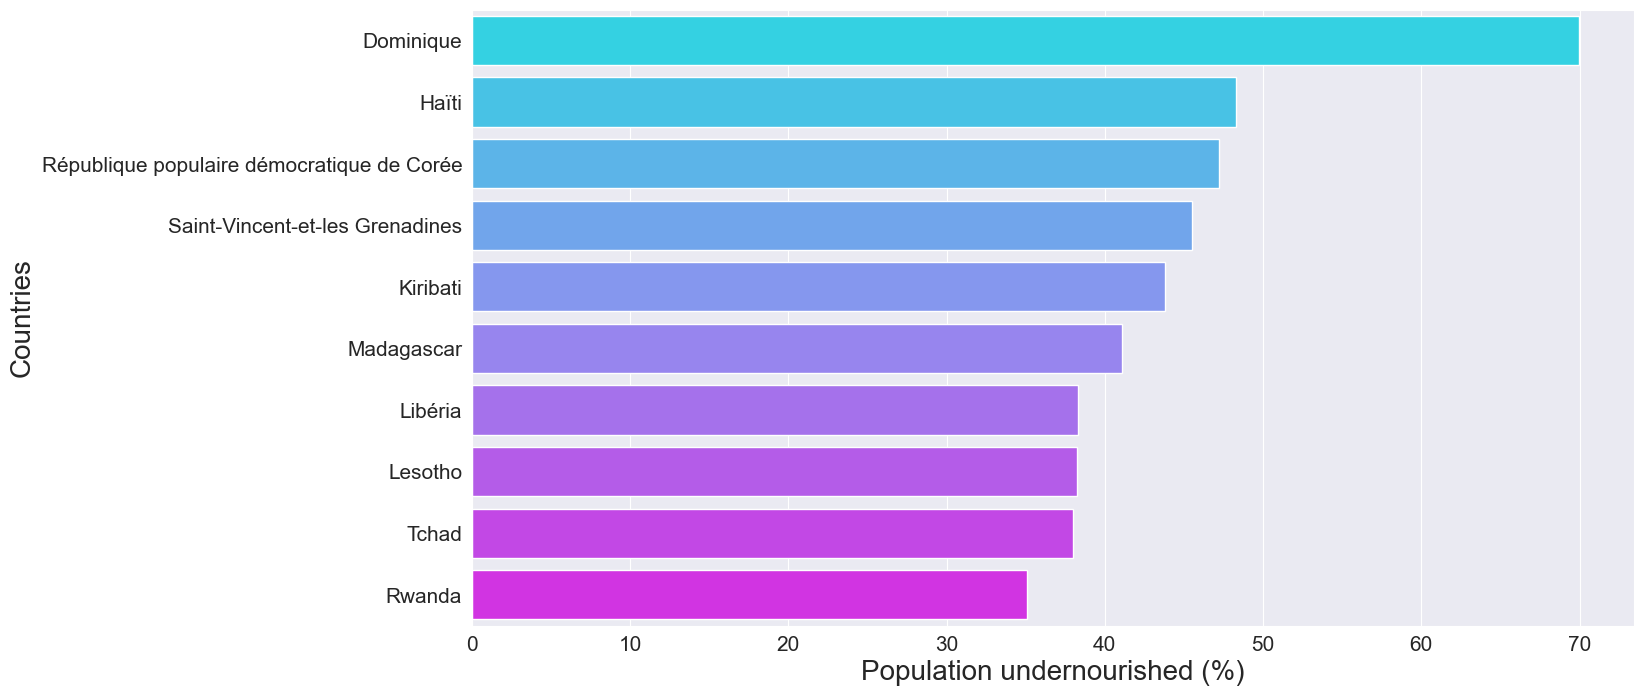

In [104]:
# Chart: Countries with the highest proportion of undernourished people in 2017 
plt.figure(figsize=(15,8))
sns.barplot(data=j_sousNutritionPop2017.sort_values('proportion',ascending=False).head(10),
            y='Zone',
            x='proportion',
            hue='Zone',
            dodge=False,
            palette='cool'
           )
plt.tick_params(axis='both',labelsize=15)
plt.ylabel('Countries',size=20)
plt.xlabel('Population undernourished (%)',size=20)
#plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,title='Zone',fontsize=14,title_fontsize=14)
plt.legend([],[],frameon=False)
plt.show()

**Caution**: 

In this table, some countries have 0.05 in 'Population undernutrition'. As a reminder we changed the value '<0.1' to '0.05' at the beginning. 

Below is the table that corresponds to the 10 countries with the highest proportion of undernourished people in 2017 that did not receive the variable change. 

In [55]:
j_sousNutritionPop2017[j_sousNutritionPop2017['Population sous-nutrition']!=0.05].sort_values('proportion',ascending=False).head(10)

,Zone,Année,Population,Population sous-nutrition,proportion
78,Haïti,2017,10982.366,5.3,48.259182
157,République populaire démocratique de Corée,2017,25429.825,12.0,47.188685
108,Madagascar,2017,25570.512,10.5,41.062924
103,Libéria,2017,4702.226,1.8,38.279742
100,Lesotho,2017,2091.534,0.8,38.249438
183,Tchad,2017,15016.753,5.7,37.957606
161,Rwanda,2017,11980.961,4.2,35.055619
121,Mozambique,2017,28649.018,9.4,32.810898
186,Timor-Leste,2017,1243.258,0.4,32.173531
0,Afghanistan,2017,36296.113,10.5,28.928718


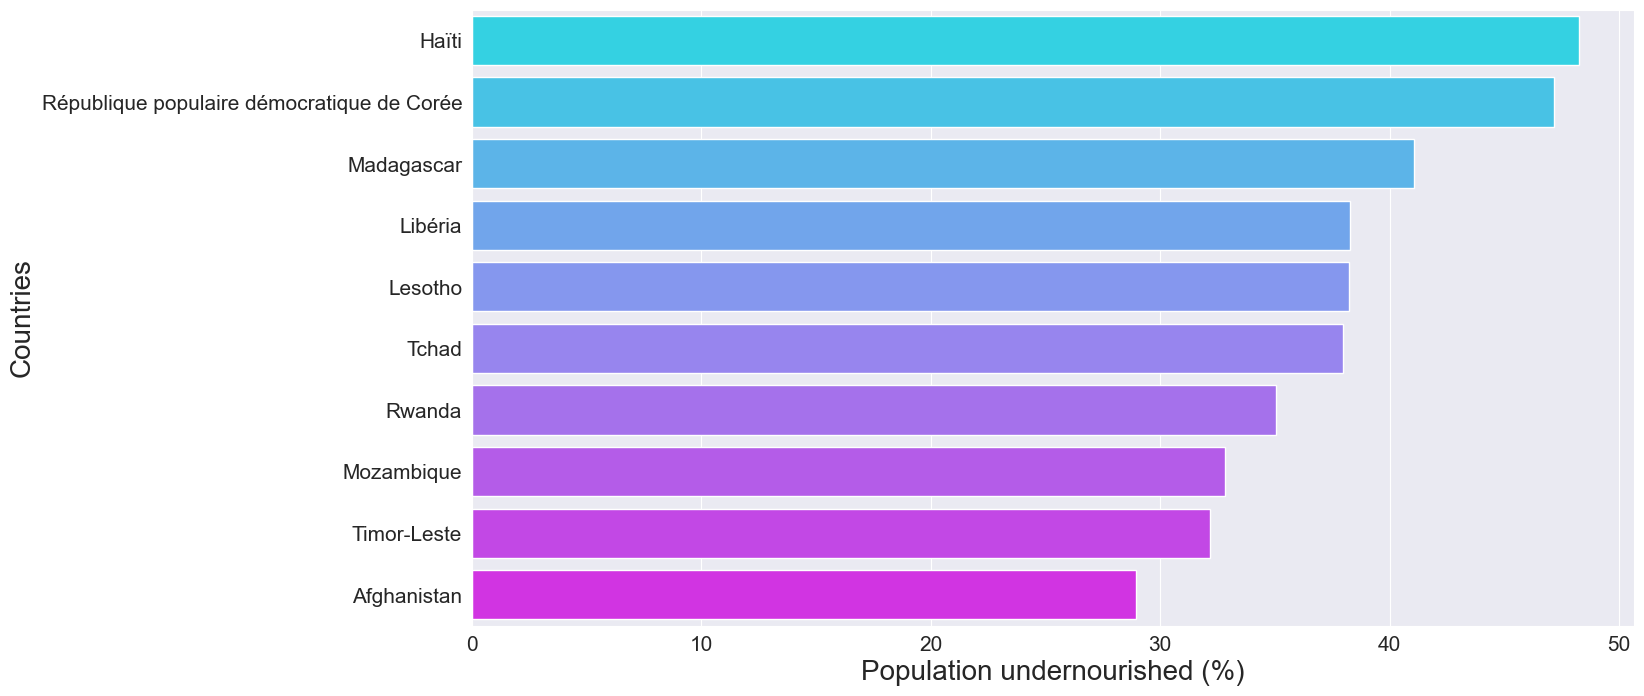

In [106]:
# Chart: Countries with the highest proportion of undernourished people in 2017 (#No change)
plt.figure(figsize=(15,8))
sns.barplot(data=j_sousNutritionPop2017[j_sousNutritionPop2017['Population sous-nutrition']!=0.05].sort_values('proportion',ascending=False).head(10),
            y='Zone',
            x='proportion',
            hue='Zone',
            dodge=False,
            palette='cool'
           )
plt.tick_params(axis='both',labelsize=15)
plt.ylabel('Countries',size=20)
plt.xlabel('Population undernourished (%)',size=20)
#plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,title='Zone',fontsize=14,title_fontsize=14)
plt.legend([],[],frameon=False)
plt.show()

---

### <font color = #7a69c5>Countries that have received the most food aid since 2013</font>

In [57]:
# Inspect
df_aideAlimentaire.describe(include='all')

,Pays bénéficiaire,Année,Produit,Valeur
count,1475,1475.000000,1475,1475.00000
unique,76,NaN,16,NaN
top,Algérie,NaN,Non-céréales,NaN
freq,39,NaN,220,NaN
mean,NaN,2014.054237,NaN,7481.96678
...,...,...,...,...
min,NaN,2013.000000,NaN,0.00000
25%,NaN,2013.000000,NaN,287.50000
50%,NaN,2014.000000,NaN,1178.00000
75%,NaN,2015.000000,NaN,4334.50000


In [58]:
df_aideAlimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [59]:
df_aideAlimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [60]:
df_aideAlimentaire.isna().mean()

Pays bénéficiaire    0.0
Année                0.0
Produit              0.0
Valeur               0.0
dtype: float64

In [61]:
df_aideAlimentaire['Année'].unique()

array([2013, 2014, 2015, 2016])

We can see that the dataframe : 
- contains the correct data types for the variables,
- does not contain any missing data; 
- in the 'Year' column: values between 2013 & 2016.
    - *No need to delete/clean the data for the calculation*

In [107]:
# Calculation of the top 10 countries that receive the most food aid:
df_aideAlimentaire.groupby('Pays bénéficiaire').agg(
    {'Valeur':np.sum}).sort_values('Valeur',ascending=False).head(10)

,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784
Kenya,552836
Bangladesh,348188
Somalie,292678
République démocratique du Congo,288502


In [63]:
df_aideAlimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


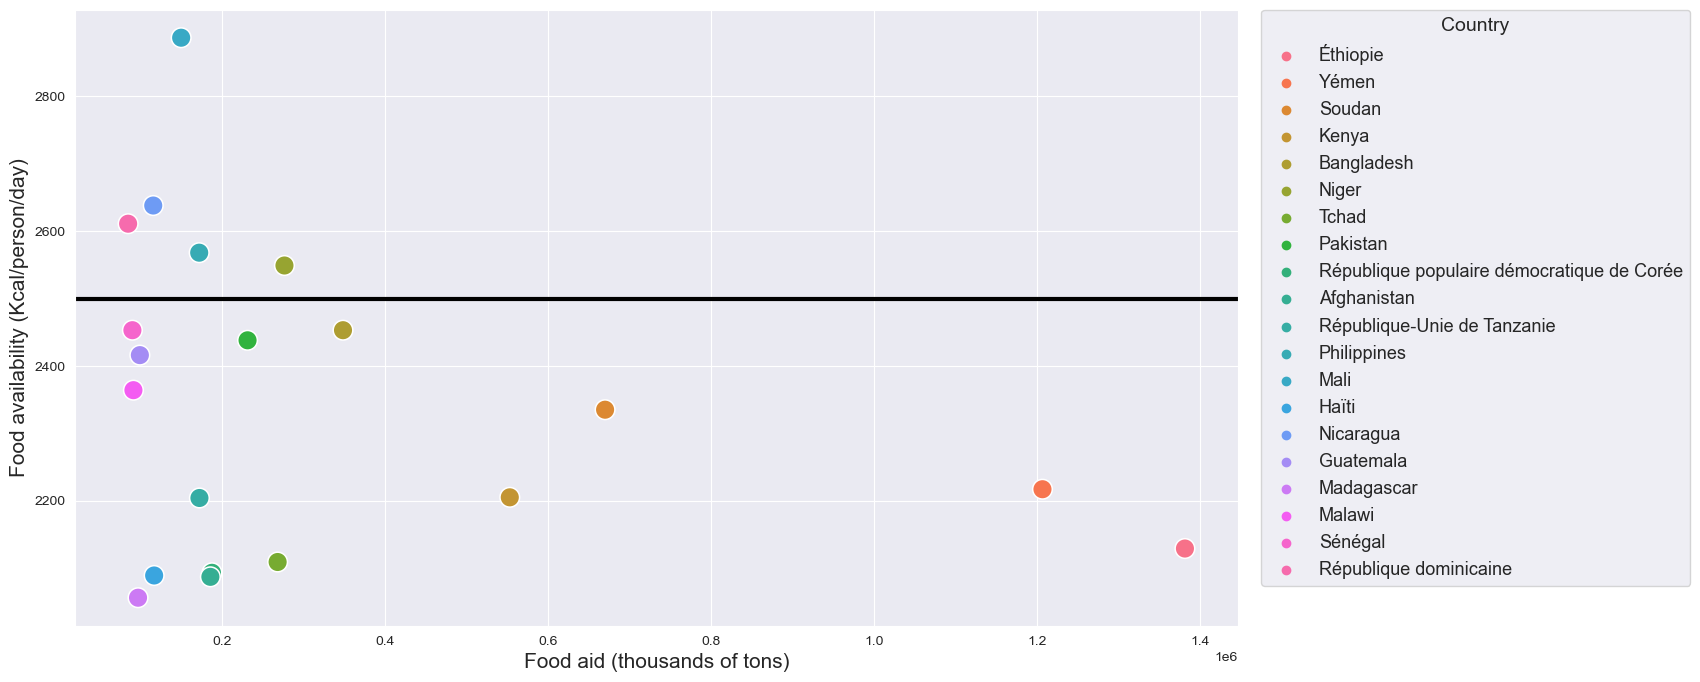

In [108]:
# Create data
df_aideAlimentaire2 = df_aideAlimentaire.copy()
df_aideAlimentaire2 = df_aideAlimentaire2.rename(columns={'Pays bénéficiaire':'Zone'})
data_graph1 = pd.merge(df_aideAlimentaire2.groupby('Zone').agg({'Valeur':np.sum}),df_dispoAlimentaire2.groupby('Zone').agg({'Disponibilité alimentaire (Kcal/personne/jour)':np.sum}),on='Zone')                             
data_graph1.reset_index(inplace=True)

# Graph: Food aid according to country's food availability
top20 = data_graph1.sort_values('Valeur',ascending=False).head(20)
plt.figure(figsize=(15,8))
sns.scatterplot(data=top20,
                x='Valeur',
                y='Disponibilité alimentaire (Kcal/personne/jour)',
                hue='Zone',
                s=200,
               )
plt.xlabel('Food aid (thousands of tons)',size=15)
plt.ylabel('Food availability (Kcal/person/day)',size=15)
#plt.ylim(0,3500)
plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,title='Country',fontsize=13,title_fontsize=14)
plt.axhline(y=2500, color='black', linestyle='-', linewidth=3)
plt.show()

The top 10 countries that receive the most food aid in the world.

*The 'value' data are expressed in tons*.

---
### <font color = #7a69c5> Countries with the most/least food availability per capita:</font>

To answer this question, we will need : df_population & df_dispoAlimentaire

In  df_population, we can find the population for each country in 2017.
In df_dispoAlimentaire, the food availability for each country for the year 2017. 

In [65]:
# Merge between the 2 dataframe
df_dispoHabitant = pd.merge(df_population2017,
                           df_dispoAlimentaire.groupby('Zone').agg({'Disponibilité alimentaire (Kcal/personne/jour)':np.sum}),on='Zone')
df_dispoHabitant = df_dispoHabitant.rename(columns = {'Valeur':'Population'})
df_dispoHabitant.head()

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,2087.0
1,Afrique du Sud,2017,57009.756,3020.0
2,Albanie,2017,2884.169,3188.0
3,Algérie,2017,41389.189,3293.0
4,Allemagne,2017,82658.409,3503.0


In [66]:
df_dispoAlimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


**Top 10 countries: most food availability per capita:**

In [67]:
df_dispoHabitant.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(10)

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
11,Autriche,2017,8819.901,3770.0
17,Belgique,2017,11419.748,3737.0
163,Turquie,2017,81116.450,3708.0
54,États-Unis d'Amérique,2017,325084.756,3682.0
80,Israël,2017,8243.848,3610.0
78,Irlande,2017,4753.279,3602.0
81,Italie,2017,60673.701,3578.0
95,Luxembourg,2017,591.910,3540.0
47,Égypte,2017,96442.591,3518.0
4,Allemagne,2017,82658.409,3503.0


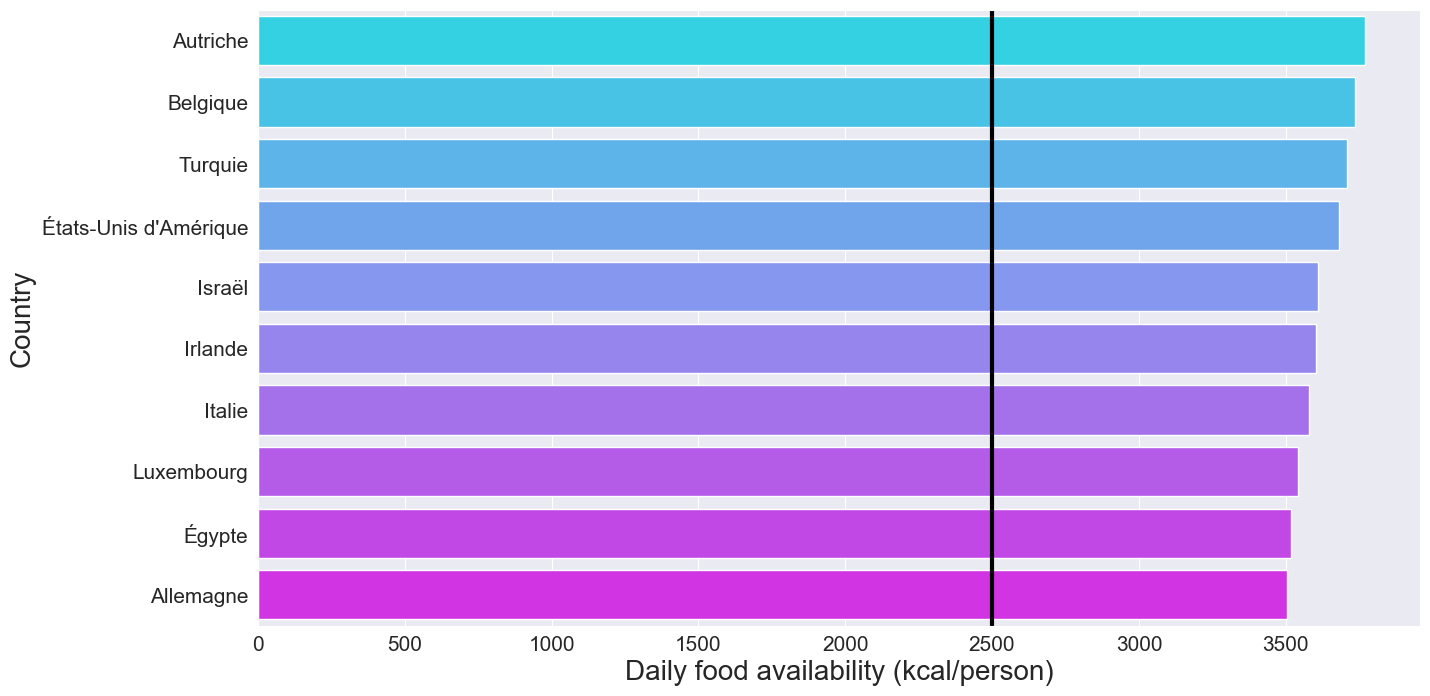

In [110]:
# Graph: Top 10 Countries: Most Food Availability per Capita
plt.figure(figsize=(15,8))
sns.barplot(data=df_dispoHabitant.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).head(10),
            y='Zone',
            x='Disponibilité alimentaire (Kcal/personne/jour)',
            hue='Zone',
            dodge=False,
            palette='cool'
           )
plt.tick_params(axis='both',labelsize=15)
plt.ylabel('Country',size=20)
plt.xlabel('Daily food availability (kcal/person)',size=20)
plt.axvline(x=2500, color='black', linestyle='-',linewidth=3)
#plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,title='Zone',fontsize=14,title_fontsize=14,frameon=False)
plt.legend([],[], frameon=False)
plt.show()

**Top 10 countries: least food availability per capita** :

In [69]:
df_dispoHabitant.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).tail(10)

,Zone,Année,Population,Disponibilité alimentaire (Kcal/personne/jour)
55,Éthiopie,2017,106399.924,2129.0
120,Ouganda,2017,41166.588,2126.0
171,Zimbabwe,2017,14236.595,2113.0
156,Tchad,2017,15016.753,2109.0
136,République populaire démocratique de Corée,2017,25429.825,2093.0
70,Haïti,2017,10982.366,2089.0
0,Afghanistan,2017,36296.113,2087.0
97,Madagascar,2017,25570.512,2056.0
170,Zambie,2017,16853.599,1924.0
131,République centrafricaine,2017,4596.023,1879.0


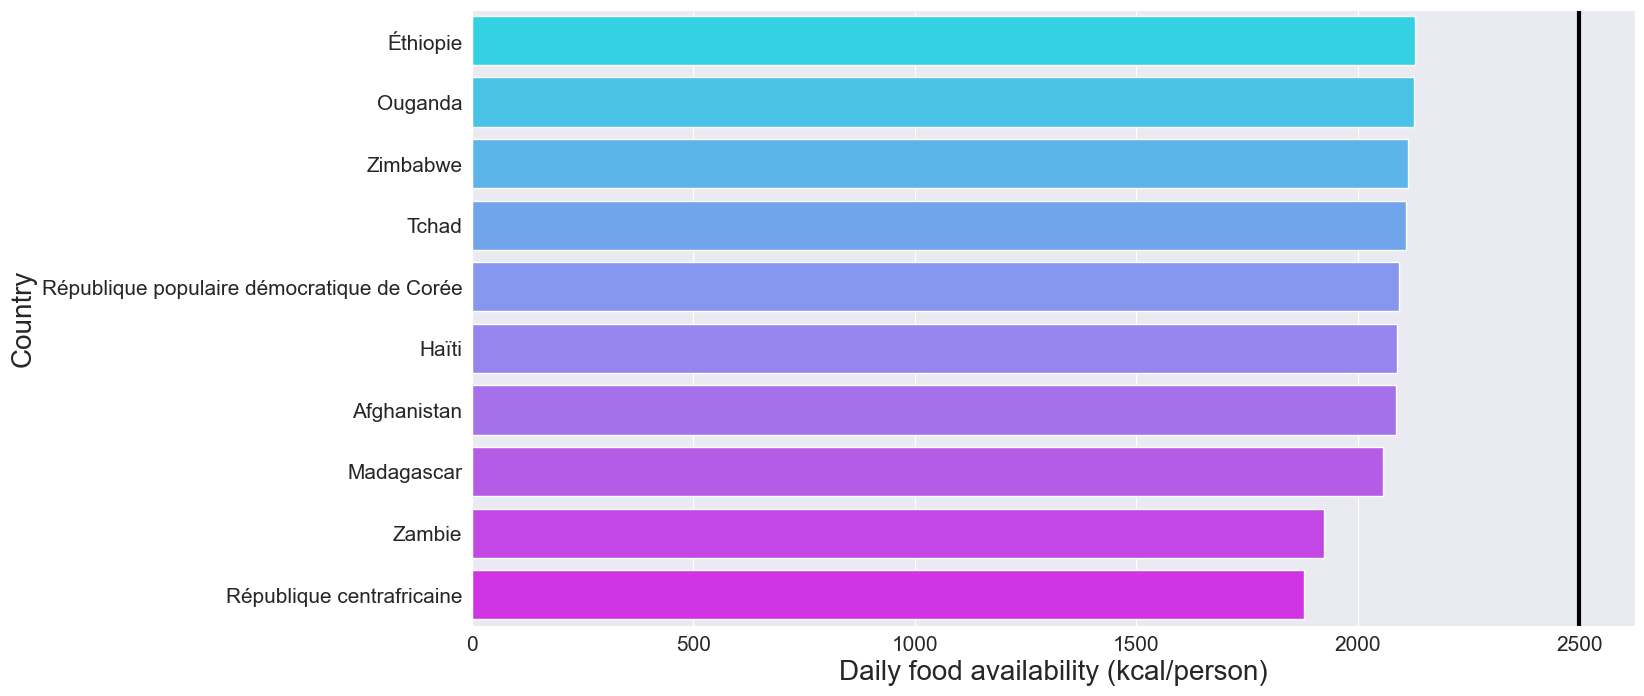

In [111]:
# Graph: Top 10 Countries: Least Food Availability per Capita
plt.figure(figsize=(15,8))
sns.barplot(data=df_dispoHabitant.sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False).tail(10),
            y='Zone',
            x='Disponibilité alimentaire (Kcal/personne/jour)',
            hue='Zone',
            dodge=False,
            palette='cool'
           )
plt.tick_params(axis='both',labelsize=15)
plt.ylabel('Country',size=20)
plt.xlabel('Daily food availability (kcal/person)',size=20)
plt.axvline(x=2500, color='black', linestyle='-',linewidth=3)
#plt.legend(bbox_to_anchor=(1.02,1),loc=2,borderaxespad=0.,title='Zone',fontsize=14,title_fontsize=14)
plt.legend([],[],frameon=False)
plt.show()

---

## <font color = #6986C5> Bonus chart :</font>

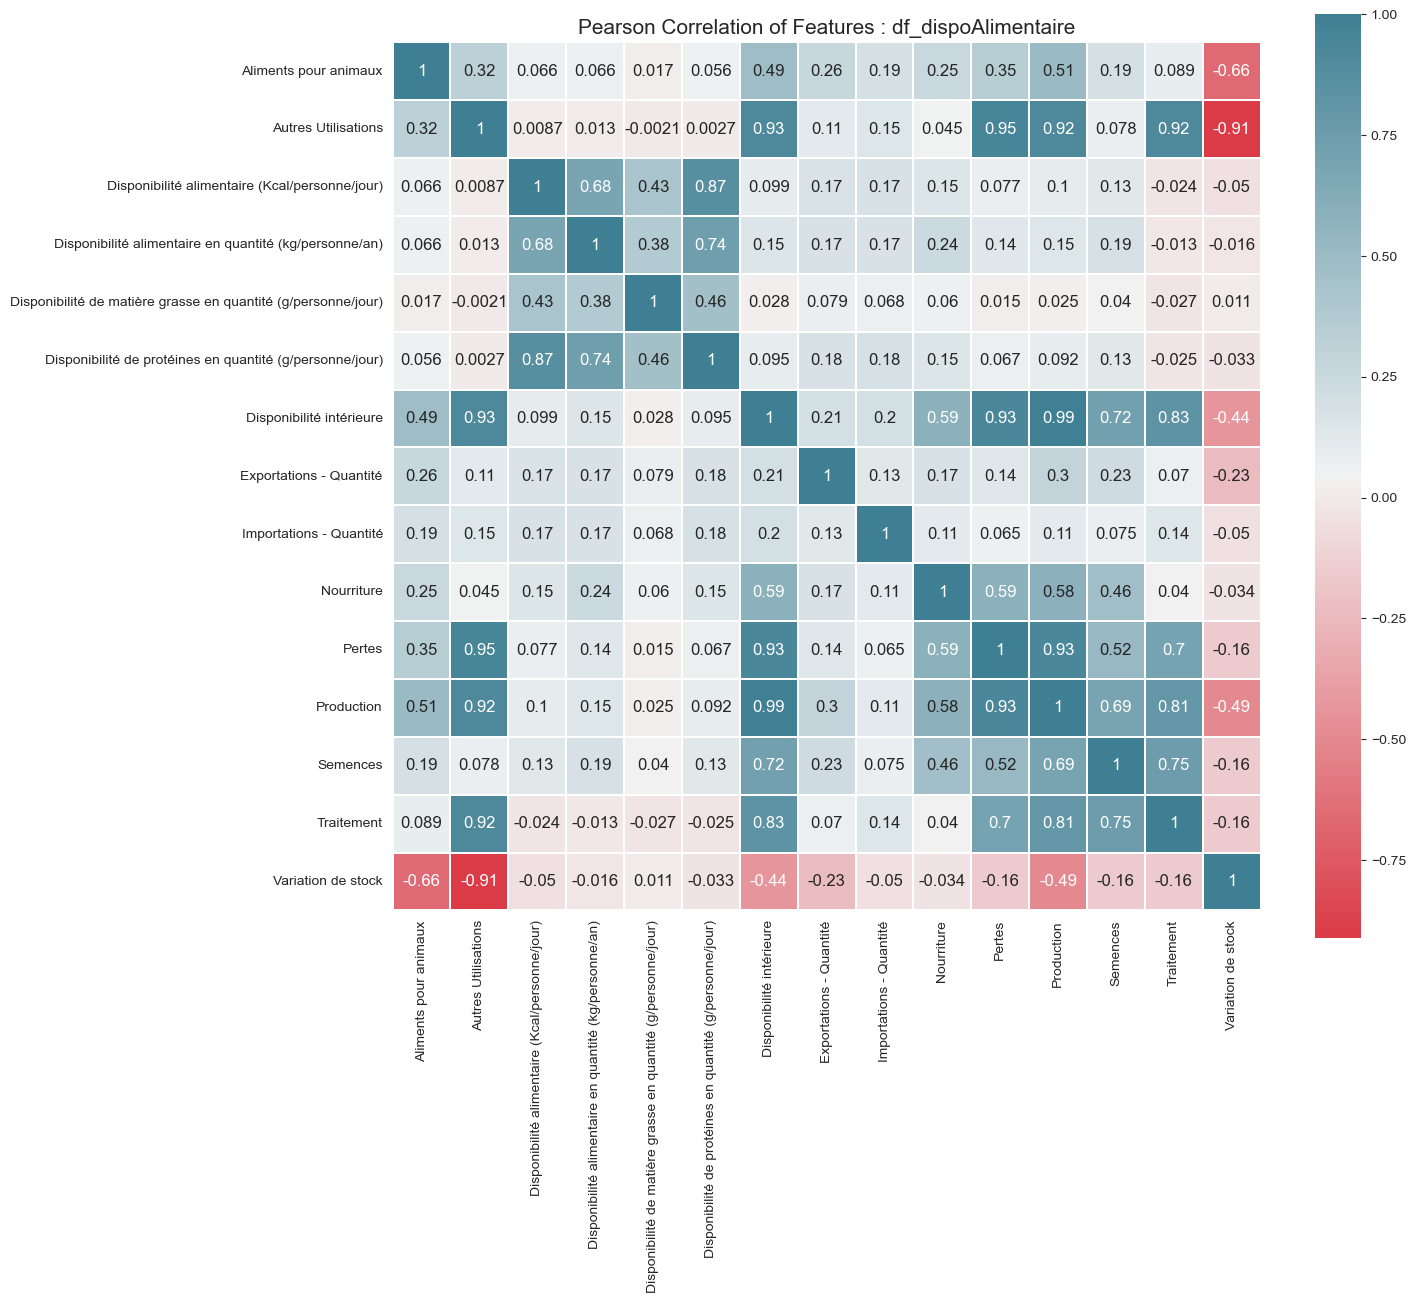

In [112]:
# Person Correlation of Features : df_dispoAlimentaire
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features : df_dispoAlimentaire', size = 15)
colormap = sns.diverging_palette(10, 220, as_cmap = True)
sns.heatmap(df_dispoAlimentaire.corr(),
            cmap = colormap,
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })
plt.show()